In [ ]:
# import library and module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import seaborn as sns
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# To read data
df13 = pd.read_csv('/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2013.csv', encoding = 'CP949')
df14 = pd.read_csv('/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2014.csv', encoding = 'CP949')
df15 = pd.read_csv('/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2015.csv', encoding = 'CP949')
df16 = pd.read_csv('/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2016.csv', encoding = 'CP949')
df17 = pd.read_csv('/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2017.csv', encoding = 'CP949')
df18 = pd.read_csv('/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2018.csv', encoding = 'CP949')
df19 = pd.read_csv('/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2019.csv', encoding = 'CP949')
df20 = pd.read_csv('/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2020.csv', encoding = 'CP949')
df21 = pd.read_csv('/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2021.csv', encoding = 'CP949')


In [ ]:
dfs = []

# Append the variables df13 to df20 to the list
for i in range(13, 21):
    df_name = "df" + str(i)
    dfs.append(eval(df_name))


# Access the variables from the list and call the info() method
for each_df in dfs:
    each_df.info()

In [ ]:
import pandas as pd

# List of CSV files to be combined
csv_files = ['/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2013.csv',
             '/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2014.csv',
             '/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2015.csv',
             '/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2016.csv',
             '/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2017.csv',
             '/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2018.csv',
             '/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2019.csv',
             '/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2020.csv',
             '/content/drive/MyDrive/DataResearch/건강보험심사평가원_의원급 표시과목별 시도별 진료비 통계_20211231/시도별_진료비_통계_2021.csv']

# Create an empty DataFrame to store the combined data
df = pd.DataFrame()

# Loop through each CSV file and read it into a DataFrame, then append to the combined_data DataFrame
for file in csv_files:
    raw_df = pd.read_csv(file,  encoding = 'CP949')
    df = df.append(raw_df, ignore_index=True)

# Write the combined data to a new CSV file
df.to_csv("df.csv", index=False)

# Optional: Print the combined data
print(df.head())

In [ ]:
sum_mediCost = df.groupby(['진료년도', '표시과목'])['보험자부담금'].sum().reset_index()

# Print the resulting data frame
print(sum_mediCost)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
#%config InlineBackend.figure_format = 'retina

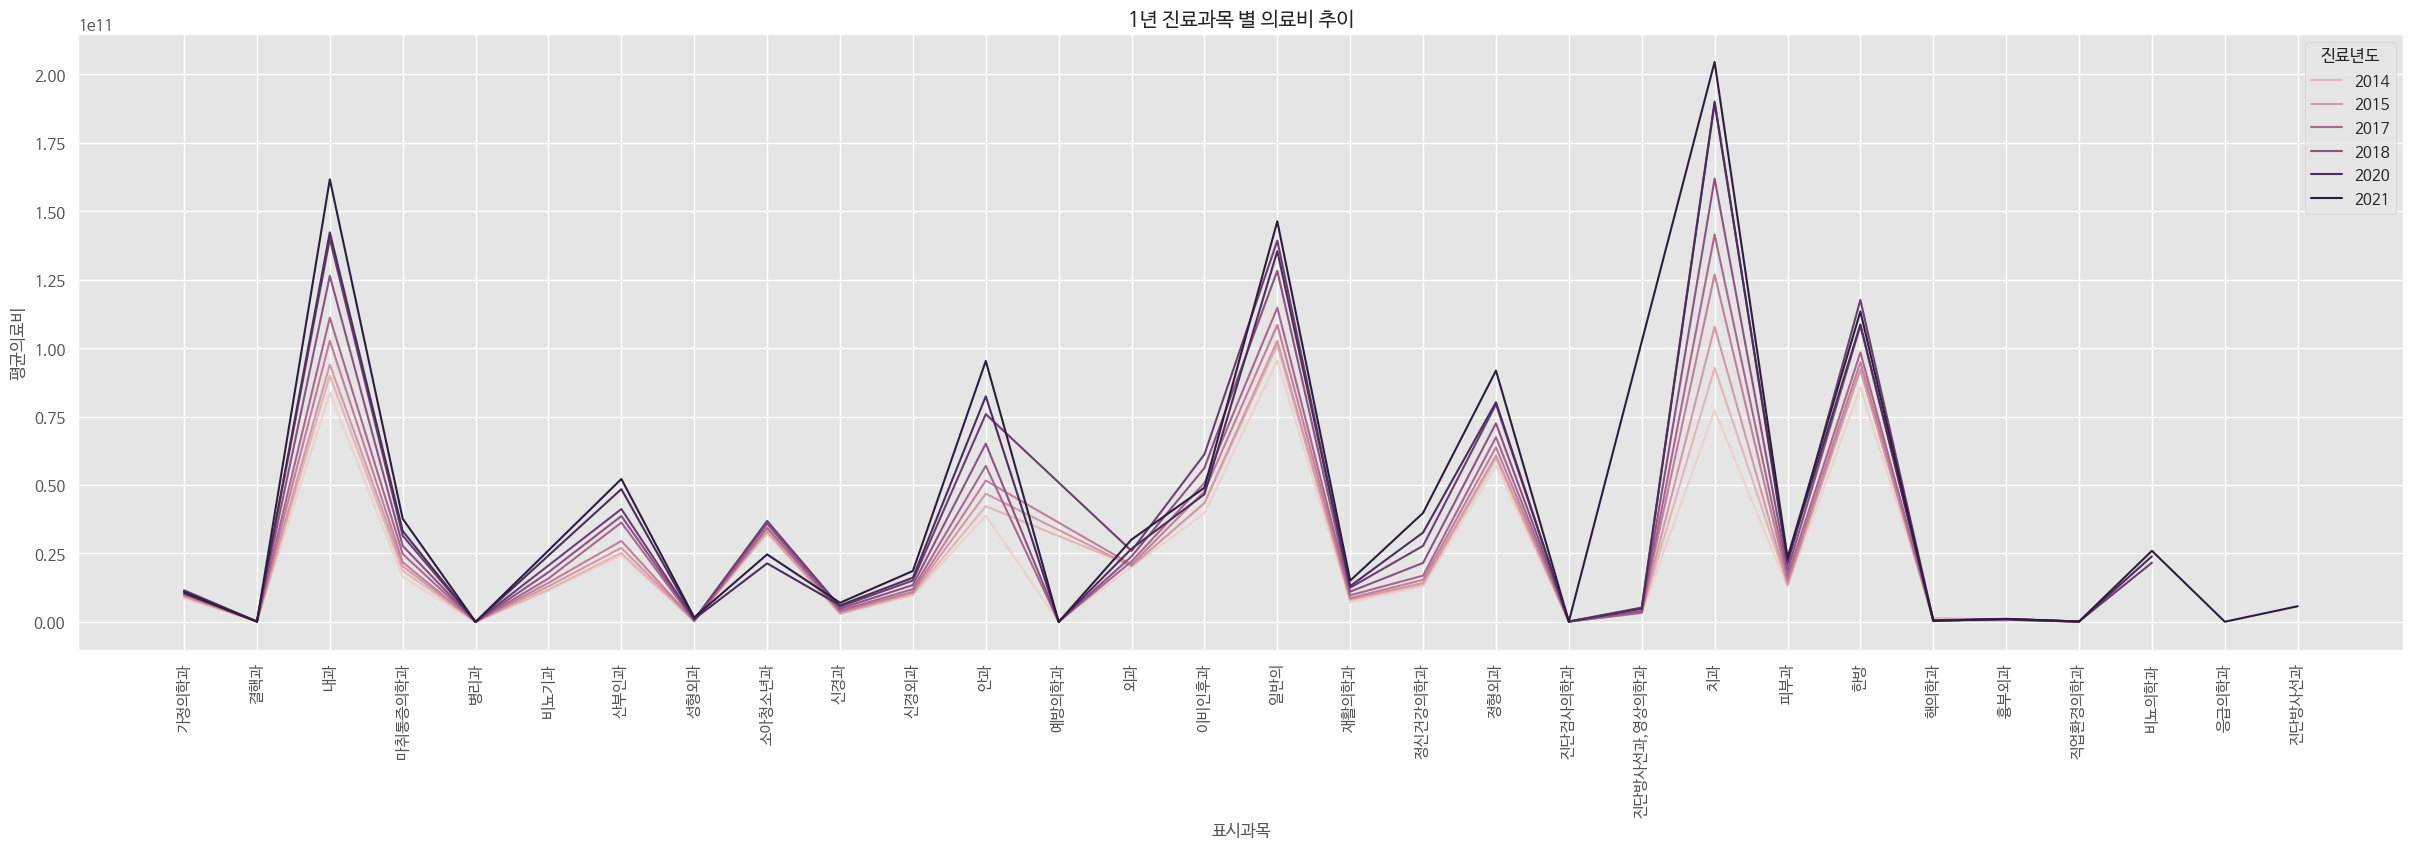

In [ ]:
df_grouped = df.groupby(['진료년도', '표시과목'])['보험자부담금'].mean().reset_index()

df_grouped
# Use seaborn to create a line plot of the trend of medical expenses
sns.lineplot(x= '표시과목', y='보험자부담금', hue='진료년도',data = df_grouped)
plt.xlabel('표시과목')
plt.ylabel('평균의료비')
plt.title('1년 진료과목 별 의료비 추이')
sns.set(rc = {'figure.figsize':(30,8)})
plt.xticks(rotation=90)
plt.show()

In [ ]:
df13

,진료년도,시도,표시과목,환자수,명세서청구건수,요양급여비용총액,보험자부담금
0,2013,서울,일반의,3838890,17940759,403769954380,315253996850
1,2013,서울,내과,3987606,18698264,400125480280,312584458860
2,2013,서울,신경과,104236,434328,12583214590,9168980230
3,2013,서울,정신건강의학과,201413,1632646,77578762940,56585879930
4,2013,서울,외과,486088,1808407,75974446520,58507752770
...,...,...,...,...,...,...,...
358,2013,세종,비뇨기과,15669,59824,869060420,640412720
359,2013,세종,재활의학과,3513,19872,438720140,316653540
360,2013,세종,가정의학과,19627,116218,1539636300,1194844170
361,2013,세종,치과,34131,95383,3316140180,2273374780


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
#%config InlineBackend.figure_format = 'retina

In [ ]:
df_test = df[(df['시도'] == '제주')]

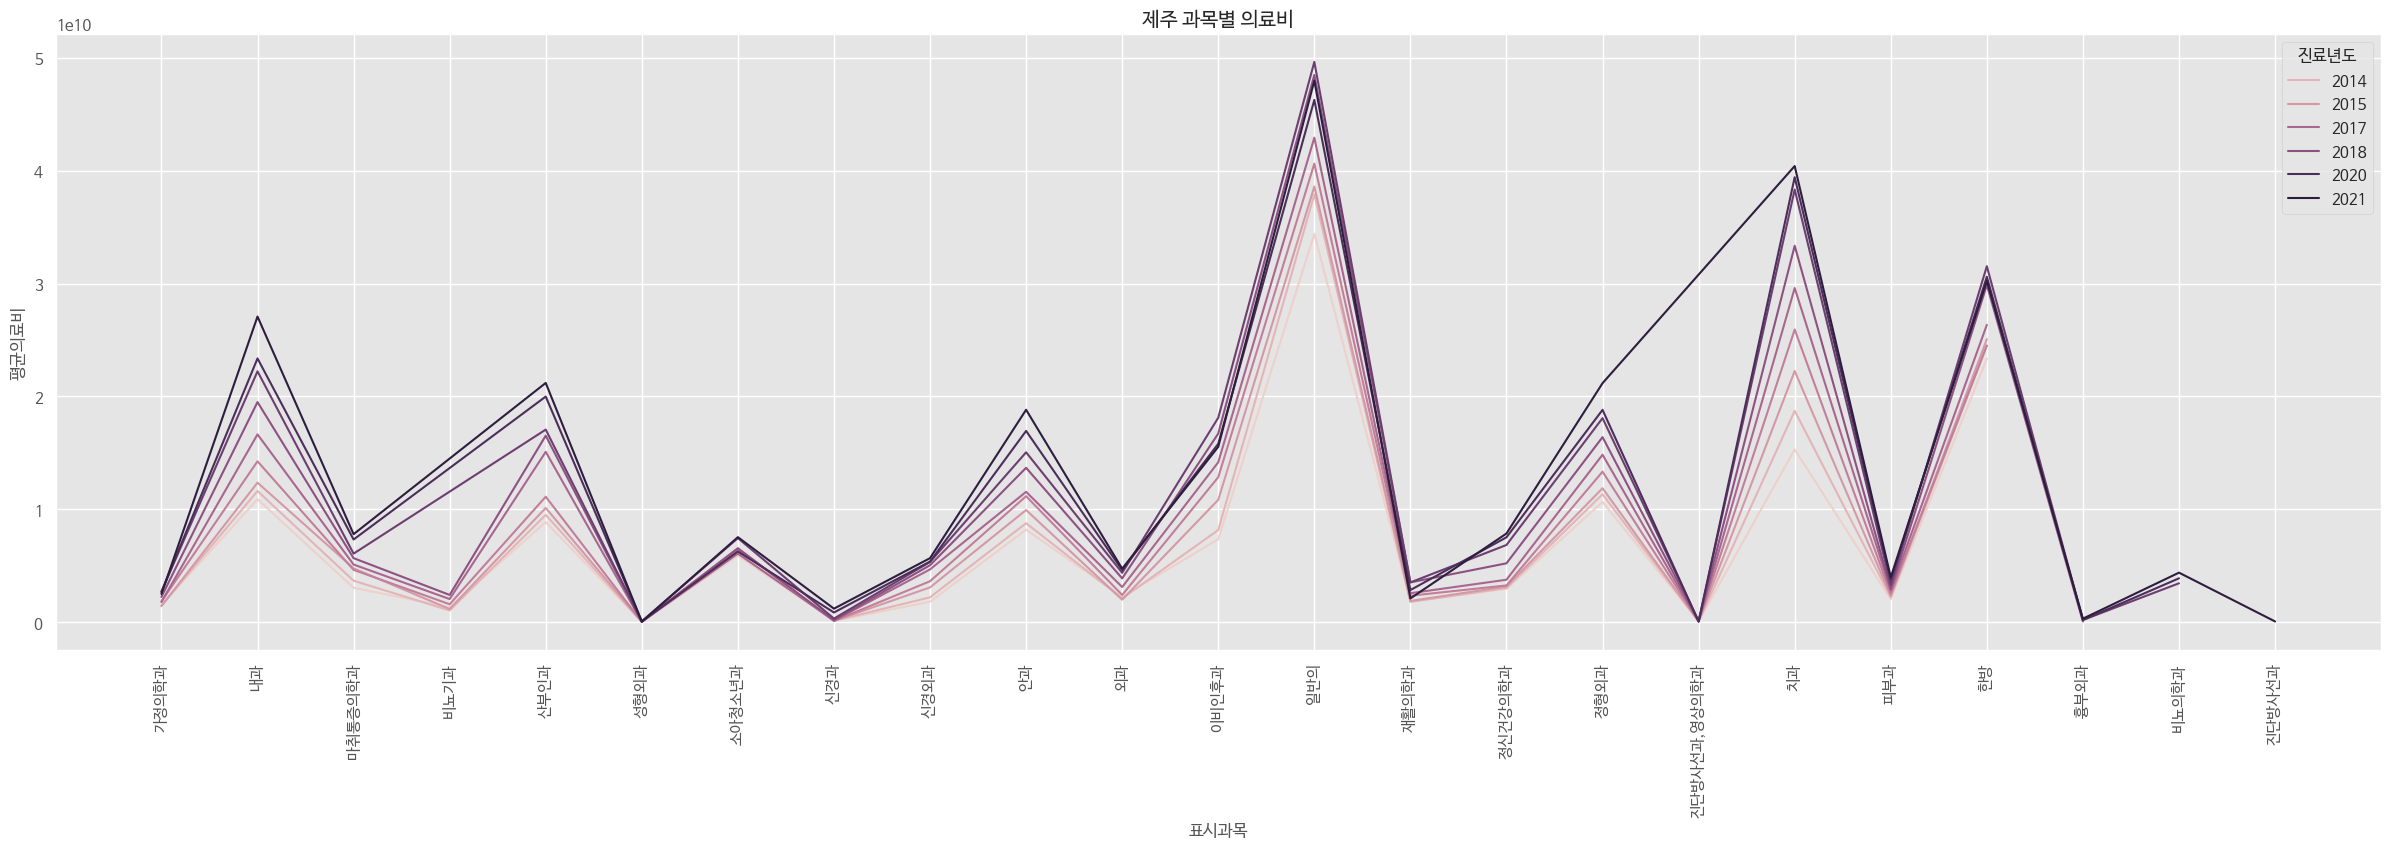

In [ ]:
df_grouped = df_test.groupby(['진료년도', '표시과목'])['보험자부담금'].mean().reset_index()

df_grouped
# Use seaborn to create a line plot of the trend of medical expenses
sns.lineplot(x= '표시과목', y='보험자부담금', hue='진료년도',data = df_grouped)
plt.xlabel('표시과목')
plt.ylabel('평균의료비')
plt.title('제주 과목별 의료비')
sns.set(rc = {'figure.figsize':(30,8)})
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("/content/1_지역별종별의료인력현황2 (1).csv",encoding='euc-kr')

In [ ]:
df.head()

,Unnamed: 0,인력코드상위,간호사,간호조무사
0,시도,요양기관종별,간호사계,간호조무사
1,서울,계,16315,1988
2,서울,종합병원,16315,1988
3,부산,계,8307,1703
4,부산,종합병원,8307,1703


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     object
 1   인력코드상위      35 non-null     object
 2   간호사         35 non-null     object
 3   간호조무사       35 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [ ]:
df.drop([0],axis=0, inplace=True)

In [ ]:
df.drop(df[df['인력코드상위']=='계'].index,axis=0,inplace=True)

In [ ]:
df.head()

,Unnamed: 0,인력코드상위,간호사,간호조무사
2,서울,종합병원,16315,1988
4,부산,종합병원,8307,1703
6,인천,종합병원,4151,1084
8,대구,종합병원,2575,603
10,광주,종합병원,3278,541


In [ ]:
df.rename(columns= {'Unnamed: 0':'지역'},inplace=True)

In [ ]:
test = df.astype({'간호조무사':int,'간호사':int})

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
#%config InlineBackend.figure_format = 'retina

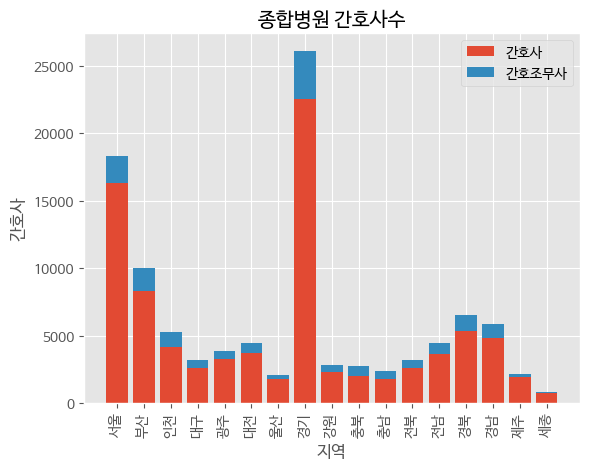

<Figure size 2000x800 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

topics = test['지역']
As = test['간호사']
Bs = test['간호조무사']


x = range(len(topics))

plt.bar(x, As)
plt.bar(x, Bs, bottom=As)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)
plt.title('종합병원 간호사수')
plt.xlabel('지역')
plt.ylabel('간호사')

plt.xticks(rotation=90)
plt.legend(['간호사', '간호조무사'])
plt.figure(figsize=(20,8))
plt.show()

In [ ]:
test.head()

,지역,인력코드상위,간호사,간호조무사,total,간호사_percent,간호조무사_percent
2,서울,종합병원,16315,1988,18303,89.1,10.9
4,부산,종합병원,8307,1703,10010,83.0,17.0
6,인천,종합병원,4151,1084,5235,79.3,20.7
8,대구,종합병원,2575,603,3178,81.0,19.0
10,광주,종합병원,3278,541,3819,85.8,14.2


In [ ]:
test['total'] = test['간호사'] + test['간호조무사']
test['간호사_percent'] = round(test['간호사'] / test['total'] * 100, 1)
test['간호조무사_percent'] = round(100 - test['간호사_percent'], 1)

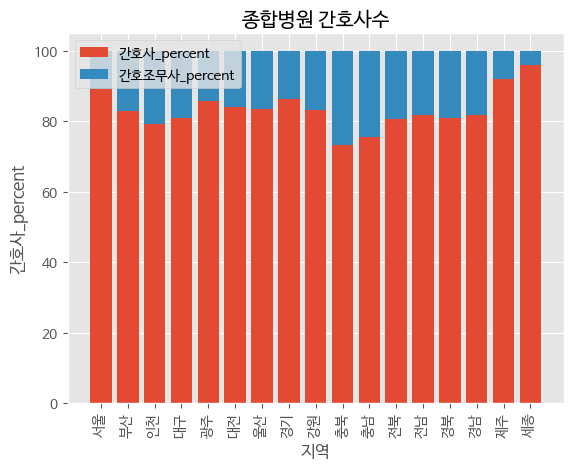

<Figure size 2000x800 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

topics = test['지역']
As = test['간호사_percent']
Bs = test['간호조무사_percent']


x = range(len(topics))

plt.bar(x, As)
plt.bar(x, Bs, bottom=As)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)
plt.title('종합병원 간호사수')
plt.xlabel('지역')
plt.ylabel('간호사_percent')

plt.xticks(rotation=90)
plt.legend(['간호사_percent', '간호조무사_percent'])
plt.figure(figsize=(20,8))
plt.show()

In [ ]:
df = pd.read_csv("/content/1_지역별종별의료인력현황2 (2).csv",encoding='euc-kr')
df.drop([0],axis=0, inplace=True)
df.drop(df[df['인력코드상위']=='계'].index,axis=0,inplace=True)
df.rename(columns= {'Unnamed: 0':'지역'},inplace=True)
test = df.astype({'간호조무사':int,'간호사':int})


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

topics = test['지역']
As = test['간호사']
Bs = test['간호조무사']


x = range(len(topics))

plt.bar(x, As)
plt.bar(x, Bs, bottom=As)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)
plt.title('요양병원 간호사수')
plt.xlabel('지역')
plt.ylabel('간호사')

plt.xticks(rotation=90)
plt.legend(['간호사', '간호조무사'])
plt.figure(figsize=(20,8))
plt.show()

In [ ]:
hospital = pd.read_csv('/content/병원평가정보.xls.csv')
hospital.head()

,NO,병원명,평가항목,평가등급,소재지,전화번호
0,1,(의)수의료재단 서청솔요양병원,요양병원,1등급,"경상남도 김해시 금관대로1084번길 15, (흥동)[*미고시]",055-310-5500
1,2,가나안요양병원,요양병원,1등급,"부산광역시 수영구 수영로 563-1, 지하1~10층 (광안동)",051-752-8000
2,3,가은병원,요양병원,1등급,"경기도 부천시 마니로24번길 43-17, (송내동, 가은병원A동)",032-667-0114
3,4,가족사랑 요양병원,요양병원,1등급,"부산광역시 부산진구 새싹로 286, 4~9층 (초읍동)",051-806-1190
4,5,강남수요양병원,요양병원,1등급,"서울특별시 관악구 신림로64길 11, 지1층,2~11층 (신림동, 성재빌딩)",02-888-8866


In [ ]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      1247 non-null   int64 
 1   병원명     1247 non-null   object
 2   평가항목    1247 non-null   object
 3   평가등급    1247 non-null   object
 4   소재지     1247 non-null   object
 5   전화번호    1246 non-null   object
dtypes: int64(1), object(5)
memory usage: 58.6+ KB


In [ ]:
hospital.drop(['NO'],axis=1,inplace=True)

In [ ]:
hospital['지역'] = hospital['소재지'].str.split(' ').str[0]

In [ ]:
hospital.head()

,병원명,평가항목,평가등급,소재지,전화번호,지역
0,(의)수의료재단 서청솔요양병원,요양병원,1등급,"경상남도 김해시 금관대로1084번길 15, (흥동)[*미고시]",055-310-5500,경상남도
1,가나안요양병원,요양병원,1등급,"부산광역시 수영구 수영로 563-1, 지하1~10층 (광안동)",051-752-8000,부산광역시
2,가은병원,요양병원,1등급,"경기도 부천시 마니로24번길 43-17, (송내동, 가은병원A동)",032-667-0114,경기도
3,가족사랑 요양병원,요양병원,1등급,"부산광역시 부산진구 새싹로 286, 4~9층 (초읍동)",051-806-1190,부산광역시
4,강남수요양병원,요양병원,1등급,"서울특별시 관악구 신림로64길 11, 지1층,2~11층 (신림동, 성재빌딩)",02-888-8866,서울특별시


In [ ]:
hospital['지역'][0]

'경상남도'

In [ ]:
for i in (hospital[hospital['지역']=='경상남도'].index):
  hospital['지역'][i] = '경남'

In [ ]:
for i in (hospital[hospital['지역']=='경상북도'].index):
  hospital['지역'][i] = '경북'

In [ ]:
for i in (hospital[hospital['지역']=='충청북도'].index):
  hospital['지역'][i] = '충북'

In [ ]:
for i in (hospital[hospital['지역']=='충청남도'].index):
  hospital['지역'][i] = '충남'

In [ ]:
for i in (hospital[hospital['지역']=='전라남도'].index):
  hospital['지역'][i] = '전남'

In [ ]:
for i in (hospital[hospital['지역']=='전라북도'].index):
  hospital['지역'][i] = '전북'

In [ ]:
hospital['지역'] = hospital['지역'].str[0:2]

In [ ]:
hospital['등급'] = hospital['평가등급'].str[0]

In [ ]:
hopital1 = hospital.drop(['평가등급','소재지','전화번호'],axis=1)

In [ ]:
hopital1.head()

,병원명,평가항목,지역,등급
0,(의)수의료재단 서청솔요양병원,요양병원,경남,1
1,가나안요양병원,요양병원,부산,1
2,가은병원,요양병원,경기,1
3,가족사랑 요양병원,요양병원,부산,1
4,강남수요양병원,요양병원,서울,1


In [ ]:
for i in (hopital1[hopital1['등급']=='등'].index):
  hopital1.drop([i],axis=0,inplace=True)

In [ ]:
hopital1 = hopital1.astype({'등급':str})

In [ ]:
hopital1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1219
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   병원명     1220 non-null   object
 1   평가항목    1220 non-null   object
 2   지역      1220 non-null   object
 3   등급      1220 non-null   object
dtypes: object(4)
memory usage: 47.7+ KB


In [ ]:
new = hopital1[hopital1['지역'] == '경남'].groupby('등급').count().T

In [ ]:
new

등급,1,2,3,4,5
병원명,14,30,30,26,9
평가항목,14,30,30,26,9
지역,14,30,30,26,9


In [ ]:
test = new.loc[['병원명']]
test['지역'] = '경남'

In [ ]:
test1 = test.reset_index()
test1.drop(['index'], axis=1,inplace=True)

In [ ]:
test1

In [ ]:
len(test)

17

In [ ]:
new = hopital1[hopital1['지역'] == '세종'].groupby('등급').count().T
new['지역'] = '세종'
test.loc[len(test)+1] = new.loc['병원명']

In [ ]:
hopital1.groupby('지역')['등급'].count()

In [ ]:
test = test.fillna(0)

In [ ]:

topics = test['지역']
As = test['1']
Bs = test['2']
Cs = test['3']
Ds = test['4']
Fs = test['5']
c_bottom = np.add(As, Bs)
d_bottom = np.add(c_bottom, Cs)
f_bottom = np.add(d_bottom, Ds)
x = range(len(topics))
plt.bar(x, As)
plt.bar(x, Bs, bottom=As)
plt.bar(x, Cs, bottom=c_bottom)
plt.bar(x, Ds, bottom=d_bottom)
plt.bar(x, Fs, bottom=f_bottom)
ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)
plt.title('지역별 요양병원 등급')
plt.xlabel('지역')
plt.ylabel('합계')
plt.legend(['1등급','2등급','3등급','4등급','5등급'])
plt.show()

In [ ]:
test1

등급,1,2,3,4,5,지역,total,1_percent,2_percent,3_percent,4_percent,5_percent
0,14.0,30,30,26,9.0,경남,109.0,12.8,27.5,27.5,23.9,8.3
1,17.0,28,23,13,7.0,서울,88.0,19.3,31.8,26.1,14.8,8.0
2,20.0,44,50,31,5.0,부산,150.0,13.3,29.3,33.3,20.7,3.3
3,6.0,15,19,8,6.0,인천,54.0,11.1,27.8,35.2,14.8,11.1
4,5.0,16,16,13,11.0,대구,61.0,8.2,26.2,26.2,21.3,18.0
5,1.0,7,14,18,6.0,광주,46.0,2.2,15.2,30.4,39.1,13.0
6,8.0,6,14,14,3.0,대전,45.0,17.8,13.3,31.1,31.1,6.7
7,4.0,11,12,4,4.0,울산,35.0,11.4,31.4,34.3,11.4,11.4
8,27.0,69,83,55,24.0,경기,258.0,10.5,26.7,32.2,21.3,9.3
9,0.0,8,6,4,6.0,강원,24.0,0.0,33.3,25.0,16.7,25.0


In [ ]:
test1['total'] = test1['1'] + test1['2'] + test1['3'] + test1['4'] + test1['5']
test1['1_percent'] = round(test1['1'] / test1['total'] * 100, 1)
test1['2_percent'] = round(test1['2'] / test1['total'] * 100, 1)
test1['3_percent'] = round(test1['3'] / test1['total'] * 100, 1)
test1['4_percent'] = round(test1['4'] / test1['total'] * 100, 1)
test1['5_percent'] = round(test1['5'] / test1['total'] * 100, 1)
#test1['2_p + ercent'] = round(100 - test1['1_percent'], 1)

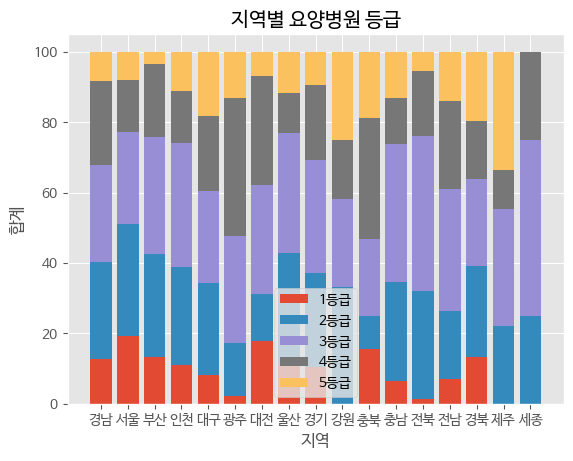

In [ ]:

topics = test1['지역']
As = test1['1_percent']
Bs = test1['2_percent']
Cs = test1['3_percent']
Ds = test1['4_percent']
Fs = test1['5_percent']
c_bottom = np.add(As, Bs)
d_bottom = np.add(c_bottom, Cs)
f_bottom = np.add(d_bottom, Ds)
x = range(len(topics))
plt.bar(x, As)
plt.bar(x, Bs, bottom=As)
plt.bar(x, Cs, bottom=c_bottom)
plt.bar(x, Ds, bottom=d_bottom)
plt.bar(x, Fs, bottom=f_bottom)
ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)
plt.title('지역별 요양병원 등급')
plt.xlabel('지역')
plt.ylabel('합계')
plt.legend(['1등급','2등급','3등급','4등급','5등급'])
plt.show()

In [ ]:
import numpy as np
target_name = np.array(['Play No', 'Play Yes'])

In [ ]:
target_name

array(['Play No', 'Play Yes'], dtype='<U8')